# 3. Machine Learning for Classification

## 3.1 Churn prediction project

- Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
- https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


## 3.2 Data preparation


- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation


In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# Imports from sci-kit learn

from sklearn.model_selection import train_test_split


In [4]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [8]:
!wget $data -O data-week-3.csv # THE $ refers to variables we have in 
                                # notebook, ! means cell command

--2022-10-08 19:27:01--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8000::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  2.72MB/s    in 0.3s    

2022-10-08 19:27:01 (2.72 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [9]:
df = pd.read_csv('data-week-3.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.head().T # transpose to see all the columns

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Make column names and categorical data consistent, lowercase and no spaces

In [20]:
df.columns = df.columns.str.lower().str.replace(' ', '_') 

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    
    df[c] = df[c].str.lower().str.replace(' ', '_') 

In [21]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [23]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

We see that senior citizen is an int not binary, and totalcharges is an
object

In [25]:
pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

So it seems that there are other things inside the dataset, must have put a space when no data is available and we replaced spaces with _ 

So lets say to pandas, okay if you dont know what to do with it just
replace with NaN, using the errors parameter, coerce means ignore and add NaN

In [30]:
tc = pd.to_numeric(df.totalcharges, errors ='coerce')

In [32]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [36]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors ='coerce')

# then fill NaN with 0, mby not the best approach since money was spent 
# prolly

df.totalcharges = df.totalcharges.fillna(0)

In [37]:
df.totalcharges.isnull().sum()

0

The churn variable also seems to be an object lets check it

In [38]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

we care about 0 or 1 though, so lets convert it

In [39]:
(df.churn == 'yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

In [40]:
df.churn = (df.churn == 'yes').astype(int)

## 3.3 Setting up the validation framework

- Perform the train/validation/test split with Scikit-Learn

In [42]:
train_test_split? # this points to the docs for info

The thing with this function is that it splits the data into two parts so train and test

In [43]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1) 

In [45]:
len(df_full_train), len(df_test)

(5634, 1409)

In [46]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1) 

In [47]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [48]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
6108,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
1530,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
3701,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


Reset indices and get the target, then delete to not accidentally use it in training. We kept churn in df_full_train to perform EDA

In [53]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [54]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [55]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA

- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

All this using the full train df

In [56]:
df_full_train = df_full_train.reset_index(drop = True)

In [57]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

value_counts with normalize divides counts by total values, 1 corresponds to users that will churn, and the % is called churn rate

In [62]:
df_full_train.churn.value_counts(normalize = True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

we can also use the mean to calculate

In [64]:
global_churn_rate = df_full_train.churn.mean()

round(global_churn_rate, 2)

0.27

 About 27% of users are churning

In [65]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

3 main numerical variables
- tenure
- monthly charges
- total charges

senior is basically categorical  (0 or 1)

In [81]:
numerical = ['tenure'] + list(df_full_train.dtypes[df_full_train.dtypes == 
                                 (float)].index)

In [82]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [83]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

Lets also keep the categorical columns, customer id not rly cat

In [85]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [86]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

5 of them are binary, most of them have 3 values

## 3.5 Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

- Churn rate
- Risk ratio
- Mutual information-later

### Churn rate

how it changes for subgroups?

In [89]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


Difference between male and female customers?

In [94]:
churn_female = df_full_train[df_full_train.gender == 
                             'female'].churn.mean()

round(churn_female , 2)

0.28

In [95]:
churn_male = df_full_train[df_full_train.gender == 
                             'male'].churn.mean()

round(churn_male , 2)

0.26

In [97]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [98]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

With/without partner? 

In [103]:
churn_partner = df_full_train[df_full_train.partner 
                                 == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [104]:
churn_no_partner = df_full_train[df_full_train.partner 
                                 == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [109]:
global_churn - churn_partner

0.06493474245795922

In [108]:
global_churn - churn_no_partner

-0.05984095297455855

So we have a big influence of relationship status on churn rates, this gives an idea that the partner variable is more important than the gender variable

### Risk ratio

In [111]:
churn_no_partner / global_churn

1.2216593879412643

In [112]:
churn_partner / global_churn

0.7594724924338315

Of course we won't manually calculate for every variable...

In SQL it would be smth like:

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

Lets take the data, group by gender and for each value of the gender variable lets calc avg take the difference and calculate also the risk, lets do it in pandas...

In [126]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

Insted of returning a Series, we want to add these to columns to the dataframe for the difference and the ratio, theres no easy way to do this, only with aggregate

In [130]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])

df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn

df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


We can repeat this for all the variables we have, we can use the list of the cat variables

In [132]:
from IPython.display import display

In [134]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn

    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


If we want to display the things that happen within the loop then we need from Ipython the special function of display 

from IPython.display import display

So we can draw some conclusions, like as we said partner is a good variable
with strong predictive power, based on the ratios and difference, same for dependents(kids)

also contract, people who have month-to-month have a high risk

So a customer with no partner, no kids and month-to-month seems super likely to churn

So these simple numbers, DIFERRENCE and RISK RATIO can provide a lot of info on which variables are more important

It would be nice to have smth, a number perhaps that describes the impotance of a variable and compare it to other variables


## 3.6 Feature Importance: Mutual Information

- Categorical features

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

- https://en.wikipedia.org/wiki/Mutual_information

So in other words how much can we learn about churn by knowing they type of contract etc.

Apart from the theory thats based on probabilities and information theory, we can simply take the formula from scikit learn:

In [135]:
from sklearn.metrics import mutual_info_score

In [141]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

order does not matter, and it tells us how much we learn about churn
by observing the contract

In [143]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [144]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

Let's implement if for the whole dataframe

In [145]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [148]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)

mi.sort_values(ascending = False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

So contract is the most important variable, gender the least

## 3.7 Feature importance: Correlation

How about numerical columns ?

- Corellation coefficient 
- https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

A way to measure the degree of dependency between two variables

In [149]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

When tenure increases (customer stays more) its less probable to churn, churn drops

Total charges the same, the more they pay the more they stay, the ones that are willing to pay more stay

Lets look at the churn rate for people staying with the company for 2 months or less

In [150]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

If more than two months

In [151]:
df_full_train[df_full_train.tenure > 2].churn.mean()

0.22478269658378816

In [153]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [154]:
df_full_train[(df_full_train.tenure > 12)].churn.mean()

0.17634908339788277

What about montly charges ?

In [156]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [157]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [158]:
df_full_train[(df_full_train.monthlycharges > 50)].churn.mean()

0.32499341585462205

So we see that for tenure we have negative correlation and for montly charges positive 

## 3.8 One-hot encoding

- Use Scikit-Leanr to encode categorical features

In [159]:
from sklearn.feature_extraction import DictVectorizer

In [162]:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [163]:
df_train[['gender', 'contract']].iloc[:10].to_dict()

{'gender': {0: 'female',
  1: 'male',
  2: 'female',
  3: 'female',
  4: 'female',
  5: 'male',
  6: 'male',
  7: 'female',
  8: 'female',
  9: 'female'},
 'contract': {0: 'two_year',
  1: 'month-to-month',
  2: 'month-to-month',
  3: 'month-to-month',
  4: 'two_year',
  5: 'month-to-month',
  6: 'month-to-month',
  7: 'month-to-month',
  8: 'two_year',
  9: 'month-to-month'}}

We want to do it row wise so lets use orient

In [164]:
df_train[['gender', 'contract']].iloc[:10].to_dict(orient = 'records')

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'}]

In [176]:
dicts = df_train[['gender', 'contract']].iloc[:10].to_dict(orient = 'records')

In [177]:
dv = DictVectorizer()

We kinda train the dict vectorizer, showing how our data looks like and from that the vectorizer sees which values are there, its vectorizer because we take a dict and turn it into a vector

In [178]:
dv.fit(dicts)

DictVectorizer()

In [169]:
dv.transform(dicts)

<10x4 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

We transform and this produces a sparse matrix, a special way of encoding data when there are many zeros, in the one-hot encoding matrix there are many zeros

But we wont use sparse here, so lets specify it

In [181]:
dv = DictVectorizer(sparse = False)

dv.fit(dicts)

DictVectorizer(sparse=False)

In [182]:
dv.transform(dicts)

array([[0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.]])

but we didnt have yearly contract here probably lets take a bigger sample

In [184]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)

dv.fit(dicts)

dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

So now we have all the different values, lets check the names

In [186]:
dv.get_feature_names()

/home/giorgos/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

What if we also passed a numerical variable?

In [187]:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)

dv.fit(dicts)

dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

It sees that this is already a numerical variable and it leaves is as is

So lets do it for the whole dataframe!!

In [190]:
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [191]:
dv = DictVectorizer(sparse = False)

dv.fit(train_dicts)

dv.get_feature_names()

/home/giorgos/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

Lets look at the values

In [195]:
dv.transform(train_dicts[:5])

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.52500e+01, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.0

first row and convert it to a list

In [201]:
list(dv.transform(train_dicts[:5])[0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

We can actually chain these, fit and transform

In [208]:
dv = DictVectorizer(sparse = False)
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

In [209]:
X_train.shape

(4225, 45)

In [212]:
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)

In [213]:
X_train.shape

(4225, 45)

Lets do it for the validation set as well, but we use only transform now, we dont fit again

In [214]:
val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')

X_val = dv.transform(val_dicts) 

## 3.9 Logistic Regression

- Binary classification
- Linear vs logistic regression

In [219]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [225]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [226]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

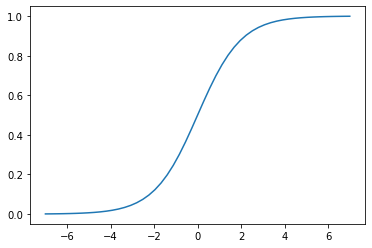

In [227]:
plt.plot(z, sigmoid(z))

In [228]:
def linear_regression(xi):
    
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [229]:
def linear_regression(xi):
    
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    reuslt = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn

- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [230]:
from sklearn.linear_model import LogisticRegression

Lets fit/train based on the dasets we created with 3.8 

In [231]:
model = LogisticRegression()

model.fit(X_train, y_train)

/home/giorgos/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Lets see the weights, 2D array with just one row

In [234]:
model.coef_[0].round(3)

array([ 0.478, -0.175, -0.41 , -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.337,  0.318, -0.089,  0.004, -0.258,  0.142,
        0.008,  0.062, -0.089, -0.081,  0.266, -0.089, -0.285, -0.231,
        0.123, -0.167,  0.059, -0.087, -0.032,  0.07 , -0.058,  0.142,
       -0.25 ,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

And also the bias term which is called intercept (because it intercepts the x axis)

In [238]:
model.intercept_[0]

-0.10894007139642682

In [239]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

These are called **hard predictions**, because we already have the exact labels (churn, not churn), but we dont know the certainty/probability which is what we are interested in

In [240]:
model.predict_proba(X_train)

array([[0.90494942, 0.09505058],
       [0.32116931, 0.67883069],
       [0.36686306, 0.63313694],
       ...,
       [0.46787373, 0.53212627],
       [0.95737276, 0.04262724],
       [0.30140042, 0.69859958]])

**predict_proba** gives the **soft predictions**, which means not just a number between 0 and 1 but a score. We have 2 columns one for probability for negative and one for the positive class, here we care about the second one (positive) which is probability of churning

In [241]:
y_pred = model.predict_proba(X_val)[:, 1]

In [242]:
y_pred >= 0.5 # default threshold to flag 0 or 1

array([False, False, False, ..., False,  True,  True])

In [243]:
churn_decision = (y_pred >= 0.5)

So lets get the people ids that are probable to churn

In [246]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 312, dtype: object

Lets also check the accuracy! How many correct predictions we made?

In [247]:
y_val 

array([0, 0, 0, ..., 0, 1, 1])

In [248]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [249]:
(y_val == churn_decision).mean()

0.8026969481902059

With mean we can see how many actually match (sum of ones/total)

In [252]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred # soft predictions
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [253]:
df_pred

,probability,prediction,actual
0,0.008994,0,0
1,0.205360,0,0
2,0.212943,0,0
3,0.542167,1,1
4,0.214308,0,0
...,...,...,...
1404,0.315381,0,0
1405,0.039397,0,1
1406,0.136317,0,0
1407,0.799583,1,1


In [254]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [256]:
df_pred.correct.mean()

0.8026969481902059

Even if we dont convert to int the booleans, the conversion happens automatically

So we have about 80% accuracy on the validation

## 3.11 Model Intrepretation

- Look at the coefficients
- Train a smaller model with fewer features

In [260]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [257]:
model.coef_[0].round(3)

array([ 0.478, -0.175, -0.41 , -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.337,  0.318, -0.089,  0.004, -0.258,  0.142,
        0.008,  0.062, -0.089, -0.081,  0.266, -0.089, -0.285, -0.231,
        0.123, -0.167,  0.059, -0.087, -0.032,  0.07 , -0.058,  0.142,
       -0.25 ,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

Let's join these together with zip

In [262]:
a = [1, 2, 3, 4]
b = 'abcd'

dict(zip(a,b)) # elements from list a become keys and from b values

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [264]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.478,
 'contract=one_year': -0.175,
 'contract=two_year': -0.41,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.337,
 'internetservice=fiber_optic': 0.318,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.142,
 'multiplelines=yes': 0.008,
 'onlinebackup=no': 0.062,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.285,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.123,
 'partner=no': -0.167,
 'partner=yes': 0.059,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 '

There are too many features here and its hard to understand, so let's look at a smaller subset

In [265]:
small = ['contract', 'tenure', 'monthlycharges']

In [267]:
df_train[small].iloc[:10].to_dict(orient = 'records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [284]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [285]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [286]:
dv_small.get_feature_names()

/home/giorgos/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [287]:
X_train_small = dv_small.transform(dicts_train_small)

In [289]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

**BIAS**

In [295]:
w0 = model_small.intercept_[0]
w0.round(3)

-2.477

**WEIGHTS**

In [294]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

Lets join them again !

In [296]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

/home/giorgos/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

Suppose we have a customer with a montly contract, that pays 50 euros per month and has been 5 months with the company

Only the **hot** variables get activate and contribute to the score, the **cold** ones dont

In [313]:
-2.47 + 1 * 0.97 + 0 * (-0.025) + 0 * (-0.949) + 50 * 0.027 + 5 * (-0.036)

-0.3300000000000001

Underscore is the magic variable for jupyter 

In [314]:
sigmoid(_) # underscore means take the output of the previous cell

0.41824062315816374

BIAS + CONTRACT + MONTHLY_CHARGES + TENURE, and thats the raw score

Lets look at the sigmoid for the bias only, which tells us the probability if we dont know anything else

In [305]:
sigmoid(-2.47) 

0.07798823512936635

So this gives quite a small chance of churning

In [306]:
sigmoid(-2.47 + 0.949) 

0.18242552380635632

When we learn that the customer has a monthly contract the prob. increases

In [307]:
sigmoid(-2.47 + 0.97 + 0.027*50) 

0.46257015465625034

The montly charge of 50 increases the prob. even more

In [308]:
sigmoid(-2.47 + 0.97 + 0.027*50 + 5 * (-0.036)) 

0.41824062315816374

But due to the tenure the prob. drops

In [315]:
-2.47 + 0.97 + 0.027*60 + 1 * (-0.036)

0.08399999999999966

In [316]:
sigmoid(_)

0.5209876607065322

For 60 euros per month and 1 month tenure sigmoid is above the threshold so the customer will churn

If 2 year contract and 30 euros per month and 24 months tenure

In [319]:
-2.47 + (-0.949) * 1 + 0.027*30 + 24 * (-0.036) 

-3.473

In [320]:
sigmoid(_)

0.030090303318277657

So if we look at all the weights for the one-hot encoding variables we can tell which ones are important, also seen before through the risk ratio

## 3.12 Using the model

We will get again the model that was trained on all features that had 80% accuracy

In [321]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

In [322]:
dicts_full_train

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [323]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_full_train)

In [324]:
y_full_train = df_full_train.churn.values

In [325]:
model = LogisticRegression() 
model.fit(X_full_train, y_full_train)
# better to split it in two steps than model = LogisticRegression().fit(X_full_train, y_full_train)

LogisticRegression()

In [326]:
dicts_test= df_test[categorical + numerical].to_dict(orient = 'records')

In [327]:
X_test = dv.transform(dicts_test)

In [337]:
y_pred = model.predict_proba(X_test)[:, 1] # only the column for churning we need

In [330]:
churn_decision = (y_pred >= 0.5)

In [331]:
(churn_decision == y_test).mean()

0.815471965933286

This probability is a little bit higher than the one on validation, we used a little bit more data also and that could be the reason. If it was slightly less accurate it would also be fine. It would be concerning if it was 95% on validation and 80% on test. 

But how to use the model? Lets look at a customer:

In [339]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

its already a dictionary, so we use a list of just one customer

In [343]:
X_small = dv.transform([customer]) 

In [344]:
X_small.shape

(1, 45)

45 features, 1 customer 

In [346]:
model.predict_proba(X_small)[0,1]

0.40568109779406214

So probably hes not going to churn

In [347]:
y_test[10]

0

And we see he didnt

In [348]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [349]:
X_small = dv.transform([customer]) 
model.predict_proba(X_small)[0,1]

0.5968852088351023

In [350]:
y_test[-1]

1

# 3.14 Explore more

More things

- Try to exclude least useful features

Use scikit-learn in project of last week

- Re-implement train/val/test split using scikit-learn in the project from the last week
- Also, instead of our own linear regression, use LinearRegression (not regularized) and RidgeRegression (regularized). Find the best regularization parameter for Ridge

Other projects

- Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
- Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
